In [69]:
import pandas as pd # извлекаем панду  
import os # для работы с файлами
import re # для регулярных выражений
import seaborn as sns # для таблиц
from statannotations.Annotator import Annotator # считает достоверности
import matplotlib.pyplot as plt #для дизайна графиков
from itertools import combinations

In [70]:

path_dir = "F:\В работу!" # ссылка на самую верхнюю папку

In [71]:

#Эта часть кода выводит название группы и образца из ссылки на таблицу
def path_to_group_name(dir_adress): # ссылка на таблицу
    index_list = []
    # print(dir_adress)
    for index,value in enumerate(dir_adress): # проходим все символы в ссылке
        if value == "/":
            index_list.append(index)
    
    index_group_start,index_group_end = index_list[-3],index_list[-2] # вручную смотрим на индексы и вписываем
    index_sample_start,index_sample_end = index_list[-2],index_list[-1] #

    group_name = dir_adress[index_group_start+1:index_group_end] # выводим символы  между слешами из ссылки
    sample_name = dir_adress[index_sample_start+1:index_sample_end] # 
    return group_name,sample_name 


In [72]:
#для одного образца создается таблица с нужными колонками 
def Get_data (correct_path,group_name,sample_name):
    islet_data_df_i = pd.read_csv(correct_path) # читает csv как таблицу
    data_i = islet_data_df_i[['ImageNumber','AreaShape_Area', 'Children_Islet_nucleus_Count','Children_Object_Glucagon_wo_double_stain_Count',
                              'Children_Object_Insulin_Glucagon_Nuclei_Count',
                              'Children_Object_Insulin_wo_double_stain_Count']].copy() # берем  колонки из большой таблицы
    data_i['Group'] = group_name # добавили к колонкам data_i колонку "группа" и заполнили данными(название группы) 
    data_i['Sample'] = sample_name # 
    return(data_i)
    


In [73]:
empty_data = {'ImageNumber':[],'AreaShape_Area':[],'Children_Islet_nucleus_Count':[], 'Children_Object_Glucagon_wo_double_stain_Count':[], 
              'Children_Object_Insulin_Glucagon_Nuclei_Count' :[], 'Children_Object_Insulin_wo_double_stain_Count' :[],'Group':[],'Sample':[]} # это словарь. Заголовок и содержание
Number_of_nucleus_df = pd.DataFrame(empty_data) # из словаря сделали таблицу. пустая 


#Берем нужный файл, применяем к нему функцию, которая делает таблицу с данными и добавляем эти данные в большую таблицу
for address, dirs, files in os.walk(path_dir): # выдает строку с адресом последней папки(address), название всех папок(dirs), название файлов
    for file in files:
        if ".csv" in str(file):
            full_path = os.path.join(address, file) # добавляет файл к адресу
            correct_path = full_path.replace("\\","/")
            group_name,sample_name = path_to_group_name(correct_path)


            if "MyExpt_Islets" in str(file):
                # print(group_name,sample_name)
                Result = Get_data(correct_path,group_name,sample_name)# из таблицы MyExpt_Islet вытаскиваем нужные данные для каждого образца с помощью функции Count of Area 
                
                Number_of_nucleus_df = pd.concat([Number_of_nucleus_df,Result],axis=0) # добавляем данные для каждого образца в общую пустую таблицу

Number_of_nucleus_df = Number_of_nucleus_df.rename(columns={'AreaShape_Area':'Area,px','Children_Islet_nucleus_Count':'Nucleus_all',
                                                             'Children_Object_Glucagon_wo_double_stain_Count':'Glucagon',  
                                                             'Children_Object_Insulin_Glucagon_Nuclei_Count': 'Insulin_Glucagon',
                                                              'Children_Object_Insulin_wo_double_stain_Count':'Insulin' })


Number_of_nucleus_df['Glucagon_part'] = Number_of_nucleus_df['Glucagon'] / Number_of_nucleus_df['Nucleus_all'] *100
Number_of_nucleus_df['Insulin_part'] = Number_of_nucleus_df['Insulin'] / Number_of_nucleus_df['Nucleus_all'] *100
Number_of_nucleus_df['Insulin_Glucagon_part'] = Number_of_nucleus_df['Insulin_Glucagon'] / Number_of_nucleus_df['Nucleus_all'] *100
Number_of_nucleus_df['Ins_Gluc_part_from_insulin'] = Number_of_nucleus_df['Insulin_Glucagon'] / Number_of_nucleus_df['Insulin'] *100
Number_of_nucleus_df['Ins_Gluc_part_from_glucagon'] = Number_of_nucleus_df['Insulin_Glucagon'] / Number_of_nucleus_df['Glucagon'] *100
print(Number_of_nucleus_df)







    ImageNumber   Area,px  Nucleus_all  Glucagon  Insulin_Glucagon  Insulin  \
0           1.0   13845.0         12.0       4.0               2.0      4.0   
1           2.0   26803.0         28.0      10.0               6.0     12.0   
2           3.0   17155.0         20.0       8.0              11.0      9.0   
3           4.0   82672.0        130.0      66.0              14.0     21.0   
0           1.0  174953.0        120.0      31.0              27.0     61.0   
..          ...       ...          ...       ...               ...      ...   
2           3.0   16996.0         20.0      13.0              20.0      0.0   
3           4.0   77934.0         30.0      30.0               0.0      0.0   
4           4.0   23028.0         17.0      17.0               0.0      0.0   
5           5.0   68028.0         45.0       2.0               1.0      2.0   
6           6.0  567363.0        404.0      13.0               6.0      5.0   

      Group      Sample  Glucagon_part  Insulin_par

In [74]:
writer = pd.ExcelWriter('C:\\Users\\Arteys\\Desktop\\Anya_work\\test.xlsx') # 

Number_of_nucleus_df.to_excel(writer) 
writer.save()

In [75]:


# unique_group= Number_of_nucleus_df['Group'].unique() # достаем уникальные названия групп. unique() выдает список

# pairs_1 = []
# pairs_2 = []
# pairs_3 = []
# pairs_4 = []

# for group in unique_group:

#     pairs_1.append(((group),('Intact')))
#     pairs_2.append(((group),('STZ-AFG')))
#     pairs_3.append(((group),('30_days')))
#     pairs_4.append(((group),('60_days')))
# print(pairs_1,pairs_2,pairs_3,pairs_4)



In [76]:


unique_group= Number_of_nucleus_df['Group'].unique() # достаем уникальные названия групп. unique() выдает список
pairs_1 = []

for group1, group2 in combinations(unique_group, 2):
    pairs_1.append(((group1),(group2)))

 

[('STZ-AFG', '30_days'), ('STZ-AFG', '60_days'), ('STZ-AFG', 'Intact'), ('30_days', '60_days'), ('30_days', 'Intact'), ('60_days', 'Intact')]


In [ ]:
# fig, axs = plt.subplots(ncols=4) #Количество колонок на панели рисунков
# fig.set_size_inches(19.5, 7.5) #Размер панели с рисунками

# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part',ax=axs[0])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part',ax=axs[1])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part',ax=axs[2])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part',ax=axs[3])

# annotator = Annotator(axs[0], pairs_1, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[1], pairs_2, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[2], pairs_3, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[3], pairs_4, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()


In [ ]:
# fig, axs = plt.subplots() #Количество колонок на панели рисунков
# # fig.set_size_inches(19.5, 7.5) #Размер панели с рисунками

# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')

# annotator = Annotator(axs, pairs_1, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STZ-AFG vs. 30_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.352e-01 Stat=3.844e-01
30_days vs. 60_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.996e-01 Stat=7.096e-01
60_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.642e-03 Stat=9.912e+00
STZ-AFG vs. 60_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.740e-01 Stat=1.848e+00
30_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.343e-05 Stat=1.721e+01
STZ-AFG vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.030e-04 Stat=1.305e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-0

c:\Users\Arteys\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STZ-AFG vs. 30_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.076e-01 Stat=6.857e-01
30_days vs. 60_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.886e-03 Stat=7.921e+00
60_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.273e-02 Stat=3.010e+00
STZ-AFG vs. 60_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.856e-02 Stat=4.280e+00
30_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.856e-01 Stat=1.140e+00
STZ-AFG vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.950e-01 Stat=6.748e-02


c:\Users\Arteys\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STZ-AFG vs. 30_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.363e-01 Stat=2.220e+00
30_days vs. 60_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.029e-01 Stat=2.660e+00
60_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.751e-02 Stat=4.327e+00
STZ-AFG vs. 60_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.000e-01 Stat=6.416e-02
30_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.438e-04 Stat=1.282e+01
STZ-AFG vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.109e-02 Stat=5.319e+00


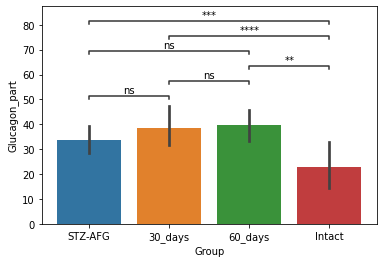

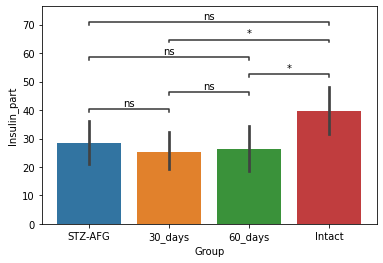

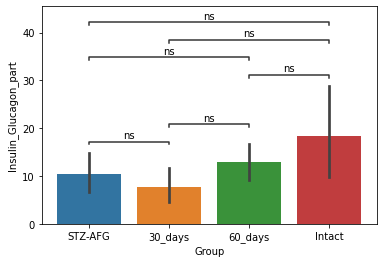

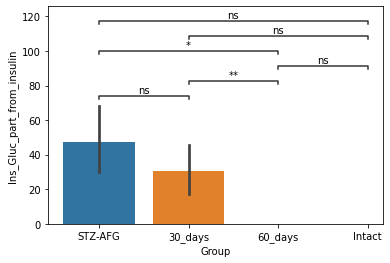

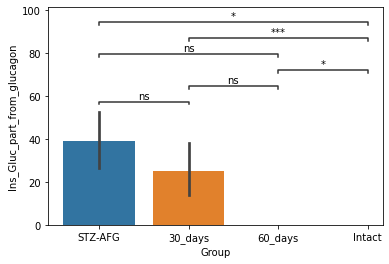

In [80]:
def function_statistic(data, column):
    fig, axs = plt.subplots()
    sns.barplot(data = data, x = 'Group', y = column)

    annotator = Annotator(axs, pairs_1, data=data, x = 'Group', y = column)
    annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

    annotator.apply_and_annotate()

function_statistic(Number_of_nucleus_df,'Glucagon_part')
function_statistic(Number_of_nucleus_df,'Insulin_part')
function_statistic(Number_of_nucleus_df,'Insulin_Glucagon_part')
function_statistic(Number_of_nucleus_df,'Ins_Gluc_part_from_insulin')
function_statistic(Number_of_nucleus_df,'Ins_Gluc_part_from_glucagon')




In [ ]:
# fig, axs = plt.subplots(ncols=4) #Количество колонок на панели рисунков
# fig.set_size_inches(19.5, 7.5) #Размер панели с рисунками

# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_part',ax=axs[0])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_part',ax=axs[1])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_part',ax=axs[2])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_part',ax=axs[3])

# annotator = Annotator(axs[0], pairs_1, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[1], pairs_2, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[2], pairs_3, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[3], pairs_4, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()



In [ ]:
# fig, axs = plt.subplots(ncols=4) #Количество колонок на панели рисунков
# fig.set_size_inches(19.5, 7.5) #Размер панели с рисунками

# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part',ax=axs[0])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part',ax=axs[1])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part',ax=axs[2])
# sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part',ax=axs[3])

# annotator = Annotator(axs[0], pairs_1, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[1], pairs_2, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[2], pairs_3, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

# annotator = Annotator(axs[3], pairs_4, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part')
# annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

# annotator.apply_and_annotate()

